In [1]:
import pandas as pd
from matplotlib import cm

from tiingo import TiingoClient
import quandl

import numpy as np
#import pandas as pd

from dateutil.relativedelta import relativedelta
import datetime

from sklearn.covariance import GraphicalLassoCV
from sklearn.covariance import GraphicalLasso

import seaborn as sns

import networkx as nx

import matplotlib.pyplot as plt

import json
import requests
import networkx as nx

import graph_tool.all as gt 

from IPython.display import Image
#Image("img/picture.png")

from datetime import date
from dateutil.relativedelta import relativedelta

import hdbscan


In [2]:
def missing_values_table(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
            " columns that have missing values.")
    return mis_val_table_ren_columns

In [3]:
df  = pd.read_csv("2020-1-2-2021-7-1-498.csv")
tiingo498  = pd.read_csv("tiingoSP498.csv")
tiingo498

ticker
0        A
1      AAL
2      AAP
3     AAPL
4     ABBV
..     ...
493    YUM
494    ZBH
495   ZBRA
496   ZION
497    ZTS

[498 rows x 1 columns]

In [4]:
tiingoList = list(tiingo498['ticker'])
#test = list(range(1, 5))


In [5]:
notinSP = pd.read_csv("notinSP.csv")

notinSP['convertedIPO'] = pd.to_datetime(notinSP['ipo'])
#notinSP.sort_values(by=['convertedIPOD'])


df = notinSP[(notinSP['convertedIPO']<pd.Timestamp(2020,11,1)) ]

In [6]:
df.sort_values(by=['convertedIPO'])

notSPList = list(df['ticker'])

In [7]:
notSPList

['DELL',
 'FICO',
 'WORK',
 'IAC',
 'DASH',
 'SC',
 'ALLY',
 'ALXN',
 'BMRN',
 'AFG',
 'BRKR',
 'EPAM',
 'BRO',
 'FWONA',
 'SIRI',
 'ZG',
 'BKI',
 'CSGP',
 'CCK',
 'CLF',
 'DAR',
 'GME',
 'EXAS',
 'ENTG',
 'DECK',
 'FDS',
 'HEI',
 'HUBB',
 'JLL',
 'LAD',
 'PATH',
 'MRVL',
 'LNG',
 'NDSN',
 'LII',
 'MKL',
 'MTN',
 'OLED',
 'ON',
 'PCG',
 'PLUG',
 'SNAP',
 'RGEN',
 'STLD',
 'RPM',
 'SGEN',
 'TECH',
 'WSM',
 'WSO',
 'ZS',
 'GGG',
 'TTC',
 'TPL',
 'PCTY',
 'LYFT',
 'SEDG',
 'SSNC',
 'GDDY',
 'GRUB',
 'FIVN',
 'OKTA',
 'TREX',
 'PINS',
 'BATRA',
 'BATRK',
 'LSXMA',
 'LSXMK',
 'ZM',
 'SPLK',
 'LSXMB',
 'DKNG',
 'CDAY',
 'FND',
 'DOCU',
 'CVNA',
 'ARES',
 'MORN',
 'CG',
 'UBER',
 'EQH',
 'XPO',
 'PODD',
 'CLR',
 'ZEN',
 'AVTR',
 'ALNY',
 'LBTYA',
 'AXON',
 'LBTYB',
 'CABO',
 'CRWD',
 'CHWY',
 'AVLR',
 'BX',
 'ATUS',
 'FNF',
 'TWLO',
 'TRU',
 'DT',
 'TDOC',
 'MOH',
 'FWONK',
 'KKR',
 'KDP',
 'CGNX',
 'PANW',
 'DISCB',
 'LULU',
 'HZNP',
 'CNA',
 'BG',
 'Z',
 'RUN',
 'UHAL',
 'OSH',
 'MASI',
 'P

In [8]:
#165 + 498
#len(notSPList)
#len(tiingoList)

Master663List = notSPList + tiingoList
len(Master663List)

663

In [9]:
df = pd.DataFrame(Master663List,columns =['Tickers'])

In [10]:
#df.to_csv('663.csv', index=False)


In [11]:
nxList = list(range(len(tiingoList)))
nxList

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [12]:
config = {}
# To reuse the same HTTP Session across API calls (and have better performance), include a session key.
config['session'] = True

# If you don't have your API key as an environment variable,
# pass it in via a configuration dictionary.
config['api_key'] = "a5e87637752491cca8c3a282688dbe81f7243561"

#quandl uUfmVoEksfwWxMA4tQcd
# Initialize
client = TiingoClient(config)

In [13]:
#months ago
n = 6

today = date.today().strftime("%Y/%m/%d")
start = date.today() - relativedelta(months=n)
start = start.strftime("%Y/%m/%d")
#start

In [18]:
#notSPList
#tiingoList

df = client.get_dataframe(tiingoList,
                                      frequency='daily',
                                      metric_name='adjClose',
                                      startDate=start,
                                      endDate=today)

ERROR:root:b'{"detail":"Error: Ticker \'LB\' not found"}'


RestClientError: 404 Client Error: Not Found for url: https://api.tiingo.com/tiingo/daily/LB/prices?format=json&resampleFreq=daily&startDate=2021%2F02%2F15&endDate=2021%2F08%2F15

In [ ]:
df = np.log1p(df.pct_change()).iloc[1:]
#df /= df.std(axis=0)
#df /= df.mad(axis=0)
df

In [21]:
df = pd.read_csv("2020-1-2-2021-7-1-498.csv")
df = np.log1p(df.pct_change()).iloc[1:]
df

A       AAL       AAP      AAPL      ABBV       ABC      ABMD  \
1   -0.016186 -0.050769  0.000063 -0.009770 -0.009537 -0.012656 -0.011858   
2    0.002952 -0.012007 -0.016571  0.007937  0.007861  0.014535  0.070694   
3    0.003061 -0.003667 -0.011933 -0.004714 -0.005721 -0.007182  0.007290   
4    0.009825  0.022522 -0.011555  0.015958  0.007062  0.009643 -0.009247   
5    0.015590  0.003943 -0.001895  0.021018  0.007678  0.014061  0.027107   
..        ...       ...       ...       ...       ...       ...       ...   
373  0.004150 -0.005834  0.017120 -0.002251 -0.015458  0.007420 -0.000866   
374  0.004404 -0.038069  0.000391  0.012468  0.000177 -0.013848  0.002885   
375  0.005931 -0.014599  0.003855  0.011435 -0.006214 -0.002618  0.002653   
376 -0.006743  0.006148 -0.000780  0.004610  0.003023  0.000437 -0.003710   
377 -0.000135  0.014045  0.018354  0.002261  0.014280  0.016889  0.002560   

          ABT       ACN      ADBE  ...       XEL      XLNX       XOM  \
1   -0.012266 -0.001667 -0.007865  ...  0.004798 -0.023289 -0.008072   
2    0.005226 -0.006551  0.005710  ... -0.001437 -0.021064  0.007649   
3   -0.005575 -0.021826 -0.000959  ... -0.002079  0.022573 -0.008218   
4    0.004068  0.001960  0.013348  ... -0.000961 -0.002819 -0.015195   
5    0.002664  0.008868  0.007607  ...  0.002241  0.023221  0.007626   
..        ...       ...       ...  ...       ...       ...       ...   
373  0.009090  0.010576  0.002418  ...  0.012598 -0.011963  0.002168   
374  0.026094 -0.002583  0.015645  ... -0.000596  0.024227 -0.025849   
375  0.012967  0.008572  0.003306  ... -0.020337  0.030628 -0.006209   
376 -0.010981 -0.005548 -0.008688  ...  0.002584  0.035682  0.007319   
377  0.010554  0.017519 -0.001555  ...  0.017305 -0.019760  0.002849   

         XRAY       XYL       YUM       ZBH      ZBRA      ZION       ZTS  
1   -0.011128  0.005869 -0.003137 -0.002617 -0.011996 -0.014212  0.000149  
2    0.005491 -0.006495 -0.000589 -0.005796  0.007626 -0.012261 -0.007707  
3    0.005285 -0.003766  0.001767 -0.000879 -0.005987 -0.006089  0.003374  
4    0.010488  0.003390  0.001764  0.011903 -0.035036  0.009802 -0.002173  
5    0.000695  0.004503  0.007898 -0.006640 -0.004614  0.006611  0.013192  
..        ...       ...       ...       ...       ...       ...       ...  
373  0.006409 -0.000599  0.002220  0.010288  0.000509  0.023157  0.009930  
374 -0.015071  0.019912 -0.009770 -0.013048  0.031763 -0.037276 -0.000801  
375  0.000474  0.000336 -0.004748 -0.015514  0.016799 -0.014131  0.004852  
376  0.000158  0.006020 -0.004597 -0.002236 -0.012332  0.003031 -0.008708  
377  0.012099  0.001499  0.008483  0.014323  0.004767  0.017998  0.015600  

[377 rows x 498 columns]

In [22]:
clusterer = hdbscan.HDBSCAN()

In [23]:
clusterer.fit(df)

HDBSCAN()

<AxesSubplot:ylabel='$\\lambda$ value'>

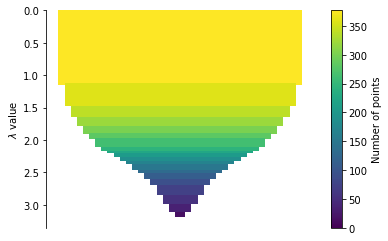

In [25]:
clusterer.condensed_tree_.plot(select_clusters=True,
                               selection_palette=sns.color_palette('deep', 8))



In [40]:
#input nxG - networkx graph
#output GT - Graph-tool graph

def nxToGT(nxG):
    edgelist = list(nxG.edges)
    GT = gt.Graph(directed=False)
    GT.add_edge_list(edgelist)
    return GT

In [41]:
def LassoCV(df,tiingoList):
    edge_model = GraphicalLassoCV(cv=10)
    #edge_model = GraphicalLasso
    #edge_model = GraphicalLasso().fit(df)

    edge_model.fit(df)
    #the precision(inverse covariance) matrix that we want
    p = edge_model.precision_
    p = pd.DataFrame(p, columns=tiingoList , index=tiingoList )


    links = p.stack().reset_index()
    links.columns = ['var1', 'var2','value']
    links=links.loc[ (abs(links['value']) > 0.00) &  (links['var1'] != links['var2']) ] 

    G=nx.from_pandas_edgelist(links,'var1','var2', create_using=nx.Graph())
    return G

In [42]:


def Lasso(df,tiingoList):
    #edge_model = GraphicalLassoCV(cv=10)
    #edge_model = GraphicalLasso
    edge_model = GraphicalLasso().fit(df)

    
    p = edge_model.precision_
    p = pd.DataFrame(p, columns=tiingoList , index=tiingoList )


    links = p.stack().reset_index()
    links.columns = ['var1', 'var2','value']
    links=links.loc[ (abs(links['value']) > 0.00) &  (links['var1'] != links['var2']) ] 

    G=nx.from_pandas_edgelist(links,'var1','var2', create_using=nx.Graph())
    return G

In [19]:
#returns a sorted list of the number input of the nodes with the highest 
#eigenvector centrality

def centrality(G, number=10):
    eigenvector = nx.eigenvector_centrality(G)
    return sorted(eigenvector.items(), key=lambda x:x[1], reverse=True)[0:number]
    

In [20]:
length = 60
window = 30

#tempDF = df[(-1-length * 2):-1]
tempDF = df[(-1-length * 2):-1]
len(tempDF[:length])

60

In [21]:
def splitDF(df, window):
    tempDFList = []
    #entropy = []
    tempDF = df[(-1-window * 2):-1]
    for i in range(window):
        tempDFList.append(tempDF[i:length+i])
    return tempDFList

In [22]:
def splitDFTwo(df,length, window):
    tempDFList = []
    tempDF = df[(-1-length):-1]
    for i in range(window):
        tempDFList.append(tempDF[i:window+i])
    return tempDFList

In [61]:
#returns a list of sub dataframes from input DF

def splitDF3(df,window, samples):
    if len(df) < (window + samples):
        return print("error")
    tempDFList = []
    start = window + samples
    tempDF = df[(-1-start):-1]
    for i in range(samples):
        tempDFList.append(tempDF[i:window+i])
    return tempDFList

In [104]:
window = 10
samples = 10
templist30 = splitDF3(df,window, samples)
templist30[7]['GL']


'07/11/21'

In [24]:
#ten = LassoCV(templist30[9],tiingoList)
#ten2 = LassoCV(templist30[8],tiingoList)
ten3 = LassoCV(templist30[3],tiingoList)

/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


In [75]:

listG = []

for i in range(length):
    G = LassoCV(templist30[i],tiingoList)
    listG.append(G)
    print(i)

/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: overflow encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: overflow encounter

0


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: U

1


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: overflow encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: overflow encounter

2


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: U

3


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: overflow encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: overflow encounter

4


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: U

5


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: U

6


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:47: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample availabl

7


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: U

8


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:47: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample availabl

9


IndexError: list index out of range

In [91]:
centralityList = []
for i in range(len(listG)):
    temp = nx.eigenvector_centrality(listG[i])
    gl = temp['GL']
    centralityList.append(gl)
centralityList[0]

0.39768438920345267

<AxesSubplot:>

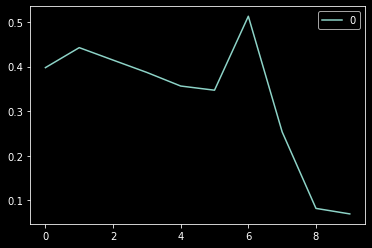

In [92]:
import matplotlib.pyplot as plt
entDF = pd.DataFrame(centralityList)
plt.style.use('dark_background')
entDF.plot()

In [32]:
#centrality(ten3)
eigenvector = nx.eigenvector_centrality(ten3)
eigenvector.items(),

(dict_items([('A', 0.005431702912363499), ('APTV', 0.10521280488477563), ('AAL', 0.026036836367400368), ('DAL', 0.10108244853928447), ('EBAY', 0.009635781087229319), ('HBAN', 0.06237799905408821), ('LYV', 0.0781809248517418), ('MO', 0.03372382556861183), ('NCLH', 0.05021291814094153), ('RCL', 0.024246053707195736), ('UAL', 0.0455979542183593), ('WDC', 0.09927589360091012), ('AAPL', 0.01324302497414701), ('IPGP', 0.043912448722775936), ('STX', 0.11332597305176884), ('ABC', 0.0016669602600723398), ('MCK', 0.013373504360999907), ('TMUS', 0.005974029046116001), ('VRSK', 0.012942866426009055), ('ABMD', 0.012867983104155661), ('CTXS', 0.0026942545704051932), ('EW', 0.036037959582400275), ('HSY', 0.03959259175124939), ('ISRG', 0.08302522710526694), ('KMB', 0.025126318940305956), ('NOC', 0.039205988708307514), ('NOW', 0.008698198426880794), ('PTC', 0.0023945021367265556), ('TFX', 0.012486753477233542), ('ACN', 0.03377244444869943), ('DOV', 0.08349070990256445), ('EXC', 0.05498963858004353), ('

In [23]:
centrality(ten2)

[('COG', 0.2854905509835384),
 ('HAL', 0.2389425806137137),
 ('PSX', 0.22063115696053182),
 ('AMZN', 0.21881030860332723),
 ('LNC', 0.21779860770845824),
 ('UNM', 0.21066017274607463),
 ('NKE', 0.20890485015648763),
 ('FANG', 0.2088471886753693),
 ('OXY', 0.18087552724810568),
 ('PRU', 0.1643283715555563)]

In [38]:
centrality(ten3)

[('HPQ', 0.20115580371486183),
 ('MAS', 0.20006246554269355),
 ('TEL', 0.19797972109897546),
 ('DHI', 0.18962408165177366),
 ('HD', 0.16690404008690357),
 ('XYL', 0.16389984251548573),
 ('JNPR', 0.15617860361148708),
 ('LOW', 0.1474533845692629),
 ('MHK', 0.14011880397949114),
 ('SIVB', 0.1348001836806055)]

In [88]:
G = listG[5]
eigenvector = nx.eigenvector_centrality(G)
sorted(eigenvector.items(), key=lambda x:x[1], reverse=True)[0:10]

[('GL', 0.3470678896244403),
 ('UNM', 0.2727930950855838),
 ('NTRS', 0.2726447201567558),
 ('LNC', 0.2631252953891755),
 ('EMR', 0.23730136286755094),
 ('TFC', 0.22113765848261968),
 ('MET', 0.20855804514065976),
 ('ZION', 0.18747976358455595),
 ('PRU', 0.18396081583886306),
 ('RF', 0.18274343121860617)]

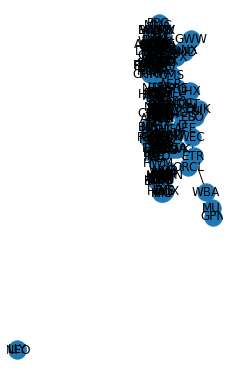

In [83]:
G = listG[9]

pos = nx.spring_layout(G, k=0.1*1/np.sqrt(len(G.nodes())), iterations=20)

plt.figure(3, figsize=(3, 5))
nx.draw(G, pos=pos)
nx.draw_networkx_labels(G, pos=pos)
plt.show()

In [22]:
#entropy = []
listG = []
listState = []
for i in range(5):
    G = LassoCV(templist30[i],tiingoList)
    print(i)
    #tempGT = nxToGT(G)
    #tempState = gt.minimize_nested_blockmodel_dl(G, deg_corr=True)
    #tempEntropy = tempState.entropy()
    #listState.append(tempState)
    listG.append(G)
    print(i)

/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: overflow encountered in multiply


0
0


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


1
1


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = a

2
2


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: overflow encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: overflow encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(

3
3


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = a

4
4


In [23]:
eigenvector = nx.eigenvector_centrality(listG[0])
sorted(eigenvector.items(), key=lambda x:x[1], reverse=True)[0:10]

[('MAS', 0.3097110697831162),
 ('DHI', 0.20998069009902698),
 ('XYL', 0.20686868071655032),
 ('HD', 0.2064808004308862),
 ('TEL', 0.1946459193090473),
 ('MHK', 0.18181635501953144),
 ('SWK', 0.17298906799791183),
 ('FBHS', 0.17085219444517835),
 ('ITW', 0.1608334748088432),
 ('AOS', 0.14340018282330977)]

In [40]:
eigenvector = nx.eigenvector_centrality(listG[1])
sorted(eigenvector.items(), key=lambda x:x[1], reverse=True)[0:450]

[('MAS', 0.2656581206746778),
 ('XYL', 0.2511221779949275),
 ('HD', 0.2145606605864039),
 ('SWK', 0.19589371065699238),
 ('DHI', 0.18396019602604188),
 ('MHK', 0.17634572252095201),
 ('ITW', 0.15487978737170233),
 ('FBHS', 0.15463912583431902),
 ('AOS', 0.14244714161142205),
 ('LOW', 0.1378577817883159),
 ('CTAS', 0.13624348694762375),
 ('PHM', 0.1242111481469071),
 ('TEL', 0.1132700594893377),
 ('AME', 0.1070656709908668),
 ('FTV', 0.10629794941036114),
 ('TJX', 0.10563012678882291),
 ('BEN', 0.10124036045559916),
 ('PNR', 0.10103828775492606),
 ('DOV', 0.09813305746985403),
 ('PNC', 0.09788147998827185),
 ('AFL', 0.09665046424425945),
 ('GWW', 0.0965483549209545),
 ('PKG', 0.0958453069823592),
 ('ALLE', 0.09570277227350134),
 ('GPS', 0.09432249241647657),
 ('LYB', 0.09421172144682752),
 ('GRMN', 0.09375780029068193),
 ('GD', 0.09373917200701258),
 ('PRU', 0.093245969302387),
 ('HPQ', 0.09220218918368478),
 ('HON', 0.09197918167248975),
 ('JCI', 0.09130418335114865),
 ('MCO', 0.088212

In [29]:
eigenvector = nx.eigenvector_centrality(listG[2])
sorted(eigenvector.items(), key=lambda x:x[1], reverse=True)[0:30]

[('MAS', 0.2657166058075811),
 ('XYL', 0.22941246101402415),
 ('HD', 0.21204567448265518),
 ('DHI', 0.19327686031119642),
 ('SWK', 0.19177122499124818),
 ('MHK', 0.17281124442454163),
 ('FBHS', 0.16740486839635504),
 ('LOW', 0.14699727041854005),
 ('ITW', 0.14178797186666772),
 ('AOS', 0.128555923387321),
 ('PHM', 0.12822360945944838),
 ('TEL', 0.12042208451715851),
 ('CTAS', 0.10982210834826045),
 ('TJX', 0.10841562710100103),
 ('PNR', 0.1064582012478197),
 ('INFO', 0.1062790859185134),
 ('BEN', 0.10462261800190291),
 ('AME', 0.10360005408704494),
 ('GRMN', 0.10309833092444674),
 ('JCI', 0.10178582679721972),
 ('ALLE', 0.10050254277247841),
 ('MCO', 0.09804262524853971),
 ('LYB', 0.09659289482965194),
 ('HPQ', 0.09648629321692422),
 ('FTV', 0.09583581851143369),
 ('GS', 0.09498378727740893),
 ('PNC', 0.09441656659147235),
 ('GD', 0.09433006039402099),
 ('NVR', 0.0916528245680057),
 ('HON', 0.09032253686722397)]

In [30]:
eigenvector = nx.eigenvector_centrality(listG[3])
sorted(eigenvector.items(), key=lambda x:x[1], reverse=True)[0:30]

[('MAS', 0.2584077857746244),
 ('XYL', 0.22213627112903497),
 ('HD', 0.21302206548693212),
 ('SWK', 0.19975019872127725),
 ('DHI', 0.18534103047175618),
 ('MHK', 0.16855727819962849),
 ('FBHS', 0.16708727855111816),
 ('LOW', 0.15696761897279346),
 ('AOS', 0.13986750428379607),
 ('TEL', 0.13646370081905593),
 ('ITW', 0.13188932231207176),
 ('MCO', 0.12422601633534056),
 ('PHM', 0.12263063166131583),
 ('TJX', 0.1106008454152389),
 ('GD', 0.11018977517178997),
 ('BEN', 0.1097233519133429),
 ('ALLE', 0.10660367587537634),
 ('INFO', 0.10498251613474044),
 ('LEG', 0.10404110651245667),
 ('AME', 0.10288748486116592),
 ('GRMN', 0.10137913184966758),
 ('GS', 0.10135820017283728),
 ('CTAS', 0.09988033135589633),
 ('JNPR', 0.09818099966946857),
 ('PNR', 0.09565315081467933),
 ('RSG', 0.09558082056914045),
 ('PNC', 0.0924967715678774),
 ('DOV', 0.0912833930381828),
 ('LYB', 0.09105885445952319),
 ('JCI', 0.09016067416461797)]

In [45]:
entropy = []
listGT = []
listState = []
for i in range(length):
    G = Lasso(templist[i],nxList)
    tempGT = nxToGT(G)
    tempState = gt.minimize_nested_blockmodel_dl(tempGT)
    tempEntropy = tempState.entropy()
    listState.append(tempState)
    entropy.append(tempEntropy)
    listGT.append(tempGT)
    print(i)

/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


0


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


1


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = a

2


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


3


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:267: ConvergenceWarning: graphical_lasso: did not converge after 100 iteration: dual gap: -4.254e-04
  warnings.warn('graphical_lasso: did not converge after '


4


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


5


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:267: ConvergenceWarning: graphical_lasso: did not converge after 100 iteration: dual gap: -5.107e-04
  warnings.warn('graphical_lasso: did not converge after '


6


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


7


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = a

8


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


9


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


10


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:267: ConvergenceWarning: graphical_lasso: did not converge after 100 iteration: dual gap: -2.809e-04
  warnings.warn('graphical_lasso: did not converge after '


11


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = a

12


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


13


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


14


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = a

15


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


16


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = a

17


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


18


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


19


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


20


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


21


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


22


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


23


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:267: ConvergenceWarning: graphical_lasso: did not converge after 100 iteration: dual gap: -1.710e-04
  warnings.warn('graphical_lasso: did not converge after '


24


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


25


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:267: ConvergenceWarning: graphical_lasso: did not converge after 100 iteration: dual gap: -1.597e-04
  warnings.warn('graphical_lasso: did not converge after '


26


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:267: ConvergenceWarning: graphical_lasso: did not converge after 100 iteration: dual gap: -1.269e-04
  warnings.warn('graphical_lasso: did not converge after '


27


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:267: ConvergenceWarning: graphical_lasso: did not converge after 100 iteration: dual gap: -2.253e-04
  warnings.warn('graphical_lasso: did not converge after '


28


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = a

29


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


30


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = a

31


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:267: ConvergenceWarning: graphical_lasso: did not converge after 100 iteration: dual gap: -1.749e-04
  warnings.warn('graphical_lasso: did not converge after '


32


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:267: ConvergenceWarning: graphical_lasso: did not converge after 100 iteration: dual gap: -1.612e-04
  warnings.warn('graphical_lasso: did not converge after '


33


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:267: ConvergenceWarning: graphical_lasso: did not converge after 100 iteration: dual gap: -1.739e-04
  warnings.warn('graphical_lasso: did not converge after '


34


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:267: ConvergenceWarning: graphical_lasso: did not converge after 100 iteration: dual gap: -2.215e-04
  warnings.warn('graphical_lasso: did not converge after '


35


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:267: ConvergenceWarning: graphical_lasso: did not converge after 100 iteration: dual gap: -1.559e-04
  warnings.warn('graphical_lasso: did not converge after '


36


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


37


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = a

38


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: overflow encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: overflow encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(

39


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: overflow encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: overflow encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(

40


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:47: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


41


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: overflow encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: overflow encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(

42


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


43


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:47: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


44


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


45


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = a

46


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: overflow encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: overflow encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(

47


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


48


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:47: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


49


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


50


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:267: ConvergenceWarning: graphical_lasso: did not converge after 100 iteration: dual gap: 2.469e-04
  warnings.warn('graphical_lasso: did not converge after '


51


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = a

52


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:267: ConvergenceWarning: graphical_lasso: did not converge after 100 iteration: dual gap: -1.269e-04
  warnings.warn('graphical_lasso: did not converge after '


53


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


54


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: overflow encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: overflow encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:47: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:47: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


55


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


56


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


57


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


58


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


59


In [46]:
entropy

[12948.349800707263,
 13049.991098039838,
 12988.150099039236,
 12824.31878401957,
 12488.789959647787,
 12591.072281854267,
 12139.26922706611,
 12320.86165064325,
 12204.665444979291,
 12117.316511564224,
 12091.45284466969,
 11670.27561735492,
 11680.000445612253,
 8313.001576596147,
 7207.466647368207,
 5706.187122928401,
 5272.18687578188,
 5104.732517356272,
 5312.531131374011,
 4841.370706928939,
 5201.5369004132035,
 5157.359693774429,
 5327.651244003075,
 5457.8833066037005,
 5599.873168521044,
 6396.120300343611,
 7862.400488395083,
 8702.22105369326,
 8901.979075703055,
 8720.841495000985,
 9857.247802320731,
 10052.188668792272,
 9230.713999034477,
 7521.199639071574,
 7088.981408018571,
 7170.028783041984,
 6807.1505165176295,
 6275.891611995395,
 12293.91840512516,
 11103.331280305378,
 11862.663704948944,
 11575.082313105278,
 11625.612224277853,
 11595.954720913409,
 11808.223014940224,
 11717.272072992724,
 11599.04989400782,
 11355.408548508394,
 11269.098214366895,
 

In [47]:
entDF = pd.DataFrame(entropy)

<AxesSubplot:>

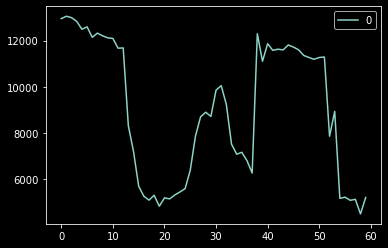

In [52]:
import matplotlib.pyplot as plt
entDF = pd.DataFrame(entropy)
plt.style.use('dark_background')
entDF.plot()

In [21]:
for i in range(5):
    temp = listState[i]
    gt.draw_hierarchy(temp, output="state"+str(i)+".png", vcmap=cm.magma)

In [ ]:

    #name = 'C:/Users/marialavrovskaa/Desktop/Images/file_' + str(image_no) + '.jpg'

In [36]:
#G = Lasso(df,tiingoList)
G = Lasso(df,nxList)

G.number_of_edges(MAS)

/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:229: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.19599421976965203, tolerance: 0.005999010889414362
  coefs, _, _, _ = cd_fast.enet_coordinate_descent_gram(
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:229: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.09482612000631008, tolerance: 0.003240587729975149
  coefs, _, _, _ = cd_fast.enet_coordinate_descent_gram(
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:229: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.39137312644357536, tolerance: 0.005322743139526873
  coefs, _, _, _ = cd_fast.enet_coordinate_descent_gram(
/home/lariat/anaconda3/envs/gt/

/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:229: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 0.008410786851680835
  coefs, _, _, _ = cd_fast.enet_coordinate_descent_gram(
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:229: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 0.006555655629303165
  coefs, _, _, _ = cd_fast.enet_coordinate_descent_gram(
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:229: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 0.0014867074708815996
  coefs, _, _, _ = cd_fast.enet_coordinate_descent_gram(
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/

/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:229: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 0.0030275767949621718
  coefs, _, _, _ = cd_fast.enet_coordinate_descent_gram(
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:229: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 0.0041824014688476826
  coefs, _, _, _ = cd_fast.enet_coordinate_descent_gram(
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:229: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 0.006312824993393895
  coefs, _, _, _ = cd_fast.enet_coordinate_descent_gram(
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance

/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:229: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 0.0029032212393287453
  coefs, _, _, _ = cd_fast.enet_coordinate_descent_gram(
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:229: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 0.005912904189474091
  coefs, _, _, _ = cd_fast.enet_coordinate_descent_gram(
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:229: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 0.0055768684637632964
  coefs, _, _, _ = cd_fast.enet_coordinate_descent_gram(
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance

/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:229: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 0.00365936656810833
  coefs, _, _, _ = cd_fast.enet_coordinate_descent_gram(
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:229: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 0.0023218325098660897
  coefs, _, _, _ = cd_fast.enet_coordinate_descent_gram(
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:229: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 0.004812889739399043
  coefs, _, _, _ = cd_fast.enet_coordinate_descent_gram(
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_

/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:229: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 0.004411501454954936
  coefs, _, _, _ = cd_fast.enet_coordinate_descent_gram(
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:229: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 0.0034310974779328796
  coefs, _, _, _ = cd_fast.enet_coordinate_descent_gram(
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:229: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 0.0034195385675475243
  coefs, _, _, _ = cd_fast.enet_coordinate_descent_gram(
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance

/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:229: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 0.005217878926575462
  coefs, _, _, _ = cd_fast.enet_coordinate_descent_gram(
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:229: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 0.003627957716199057
  coefs, _, _, _ = cd_fast.enet_coordinate_descent_gram(
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:229: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 0.004330099786809863
  coefs, _, _, _ = cd_fast.enet_coordinate_descent_gram(
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_

/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:229: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 0.007634049346190674
  coefs, _, _, _ = cd_fast.enet_coordinate_descent_gram(
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:229: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 0.0004469029641106861
  coefs, _, _, _ = cd_fast.enet_coordinate_descent_gram(
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:229: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 0.003048302413650357
  coefs, _, _, _ = cd_fast.enet_coordinate_descent_gram(
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/

/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:229: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 0.007454104712682373
  coefs, _, _, _ = cd_fast.enet_coordinate_descent_gram(
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:229: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 0.0035446899815357747
  coefs, _, _, _ = cd_fast.enet_coordinate_descent_gram(
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:229: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 0.003922121723293587
  coefs, _, _, _ = cd_fast.enet_coordinate_descent_gram(
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/

/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:229: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 0.005945467041069274
  coefs, _, _, _ = cd_fast.enet_coordinate_descent_gram(
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:229: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 0.0037586703166074624
  coefs, _, _, _ = cd_fast.enet_coordinate_descent_gram(
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:229: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 0.0034997095885826363
  coefs, _, _, _ = cd_fast.enet_coordinate_descent_gram(
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance

/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:229: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 0.003996357256846459
  coefs, _, _, _ = cd_fast.enet_coordinate_descent_gram(
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:229: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 0.008373267332420357
  coefs, _, _, _ = cd_fast.enet_coordinate_descent_gram(
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:229: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 0.005934191266437303
  coefs, _, _, _ = cd_fast.enet_coordinate_descent_gram(
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_

/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:229: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 0.0047377256674866605
  coefs, _, _, _ = cd_fast.enet_coordinate_descent_gram(
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:229: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 0.008299977535472467
  coefs, _, _, _ = cd_fast.enet_coordinate_descent_gram(
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:229: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 0.003317605274138874
  coefs, _, _, _ = cd_fast.enet_coordinate_descent_gram(
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/

/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:229: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 0.002200711321967624
  coefs, _, _, _ = cd_fast.enet_coordinate_descent_gram(
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:229: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 0.0029303723386343997
  coefs, _, _, _ = cd_fast.enet_coordinate_descent_gram(
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:229: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 0.0009581144551013637
  coefs, _, _, _ = cd_fast.enet_coordinate_descent_gram(
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance

/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:229: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 0.0023013128266097054
  coefs, _, _, _ = cd_fast.enet_coordinate_descent_gram(
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:229: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 0.0015934307313122797
  coefs, _, _, _ = cd_fast.enet_coordinate_descent_gram(
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:229: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 0.006927091718645647
  coefs, _, _, _ = cd_fast.enet_coordinate_descent_gram(
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance

FloatingPointError: Non SPD result: the system is too ill-conditioned for this solver. The system is too ill-conditioned for this solver

In [31]:
#G=nx.from_pandas_edgelist(links,'var1','var2', create_using=nx.Graph())
G=listG[3]
pos = nx.spring_layout(G, k=0.1*1/np.sqrt(len(G.nodes())), iterations=20)

EdgeDataView([('MAS', 'ACN'), ('MAS', 'AFL'), ('MAS', 'ALLE'), ('MAS', 'AME'), ('MAS', 'AMP'), ('MAS', 'AOS'), ('MAS', 'AVY'), ('MAS', 'BBY'), ('MAS', 'CB'), ('MAS', 'CDW'), ('MAS', 'CMI'), ('MAS', 'CSCO'), ('MAS', 'DHI'), ('MAS', 'DVA'), ('MAS', 'ETN'), ('MAS', 'EXPD'), ('MAS', 'FAST'), ('MAS', 'FBHS'), ('MAS', 'FDX'), ('MAS', 'GD'), ('MAS', 'GLW'), ('MAS', 'GPC'), ('MAS', 'GPS'), ('MAS', 'GWW'), ('MAS', 'HBI'), ('MAS', 'HCA'), ('MAS', 'HD'), ('MAS', 'HON'), ('MAS', 'HPE'), ('MAS', 'HPQ'), ('MAS', 'HSIC'), ('MAS', 'INFO'), ('MAS', 'ITW'), ('MAS', 'IVZ'), ('MAS', 'J'), ('MAS', 'JBHT'), ('MAS', 'JCI'), ('MAS', 'KIM'), ('MAS', 'L'), ('MAS', 'LEN'), ('MAS', 'LHX'), ('MAS', 'LKQ'), ('MAS', 'LMT'), ('MAS', 'MCO'), ('MAS', 'MET'), ('MAS', 'MMM'), ('MAS', 'NLSN'), ('MAS', 'NOC'), ('MAS', 'NVR'), ('MAS', 'NWL'), ('MAS', 'ODFL'), ('MAS', 'PCAR'), ('MAS', 'PFG'), ('MAS', 'PHM'), ('MAS', 'PKG'), ('MAS', 'PNR'), ('MAS', 'POOL'), ('MAS', 'PPG'), ('MAS', 'PRU'), ('MAS', 'PWR'), ('MAS', 'ROL'), ('MAS

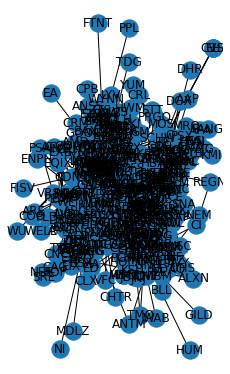

In [32]:

plt.figure(3, figsize=(3, 5))
nx.draw(G, pos=pos)
nx.draw_networkx_labels(G, pos=pos)
plt.show()

In [14]:
G.number_of_edges()

3176

In [16]:
nxt = nxToGT(G)

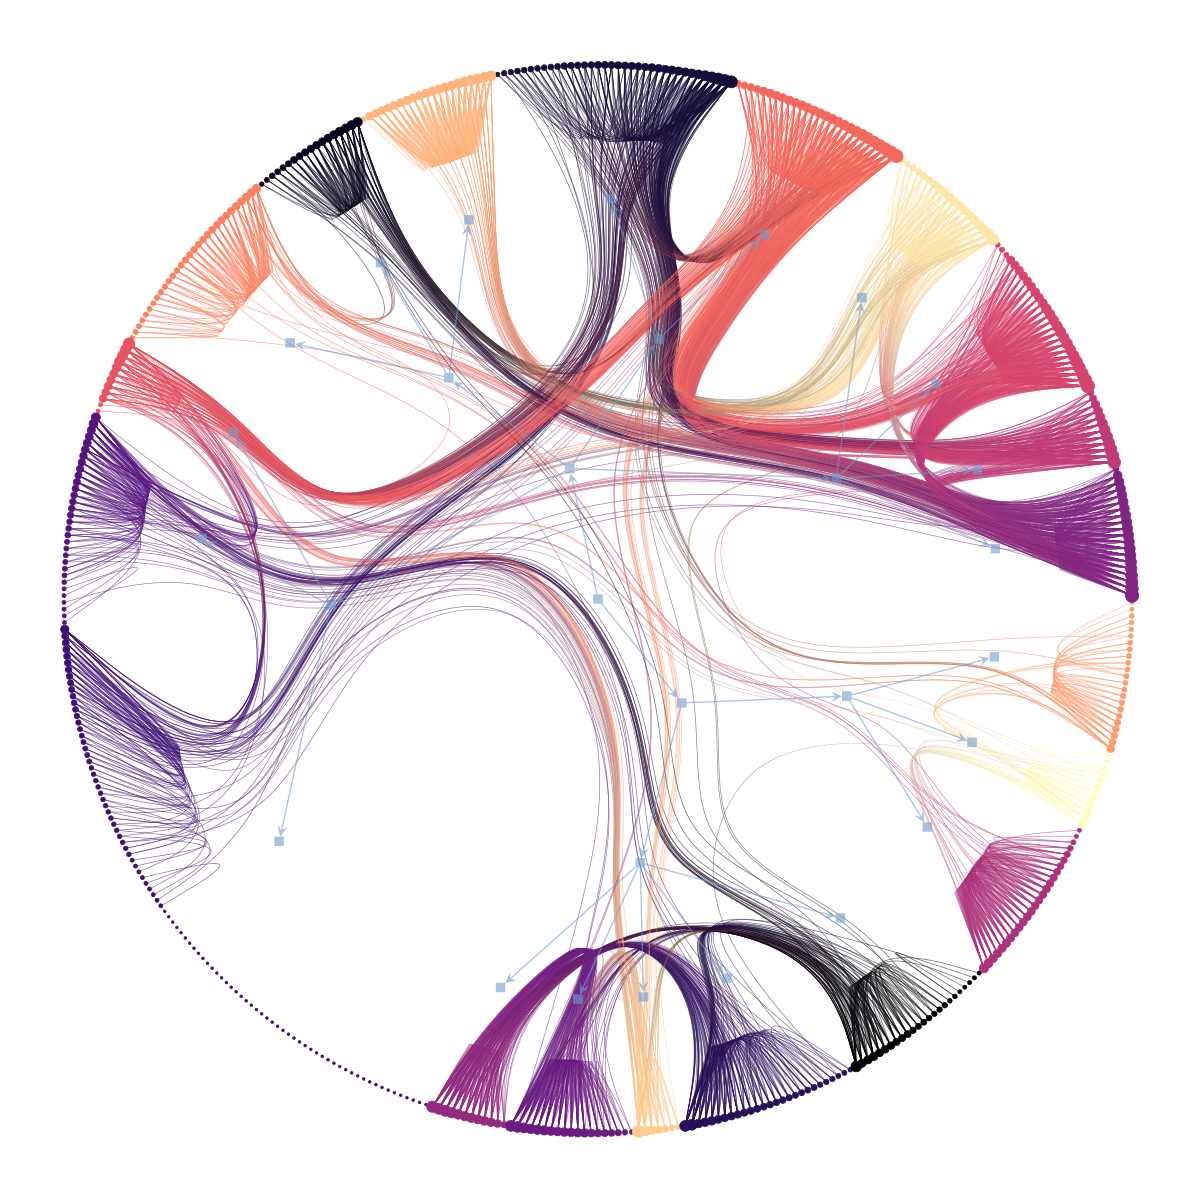

In [17]:
state = gt.minimize_nested_blockmodel_dl(nxt)
#state = gt.minimize_nested_blockmodel_dl(gtGraph, deg_corr=True, overlap=True)
gt.draw_hierarchy(state, output="1.png", vcmap=cm.magma)
Image("1.png")

In [18]:
state.entropy()

10047.50531708276

In [28]:
#input precision matrix
#output networkX G

def makeLinks(p):
    links = p.stack().reset_index()
    links.columns = ['var1', 'var2','value']
    links=links.loc[ (abs(links['value']) > 0.00) &  (links['var1'] != links['var2']) ] 
    G=nx.from_pandas_edgelist(links,'var1','var2', create_using=nx.Graph())
    return G

In [49]:
##Temporal Graphical Lasso

def graphLasso(df, inputlist):
    edge_model = GraphicalLassoCV(cv=10)
    #edge_model = GraphicalLasso
    #edge_model = GraphicalLasso().fit(first_n_column)

    edge_model.fit(df)
    #the precision(inverse covariance) matrix that we want
    p = edge_model.precision_
    p = pd.DataFrame(p, columns=inputlist , index=inputlist )
    return p

In [50]:
lassovar = graphLasso(df, nxList)

/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


In [51]:
type(lassovar)

pandas.core.frame.DataFrame

In [52]:
G = makeLinks(lassovar)

In [53]:
nxG = nxToGT(G)
nxG.edges

<bound method Graph.edges of <Graph object, undirected, with 496 vertices and 26 edges, at 0x7ff3b709c910>>

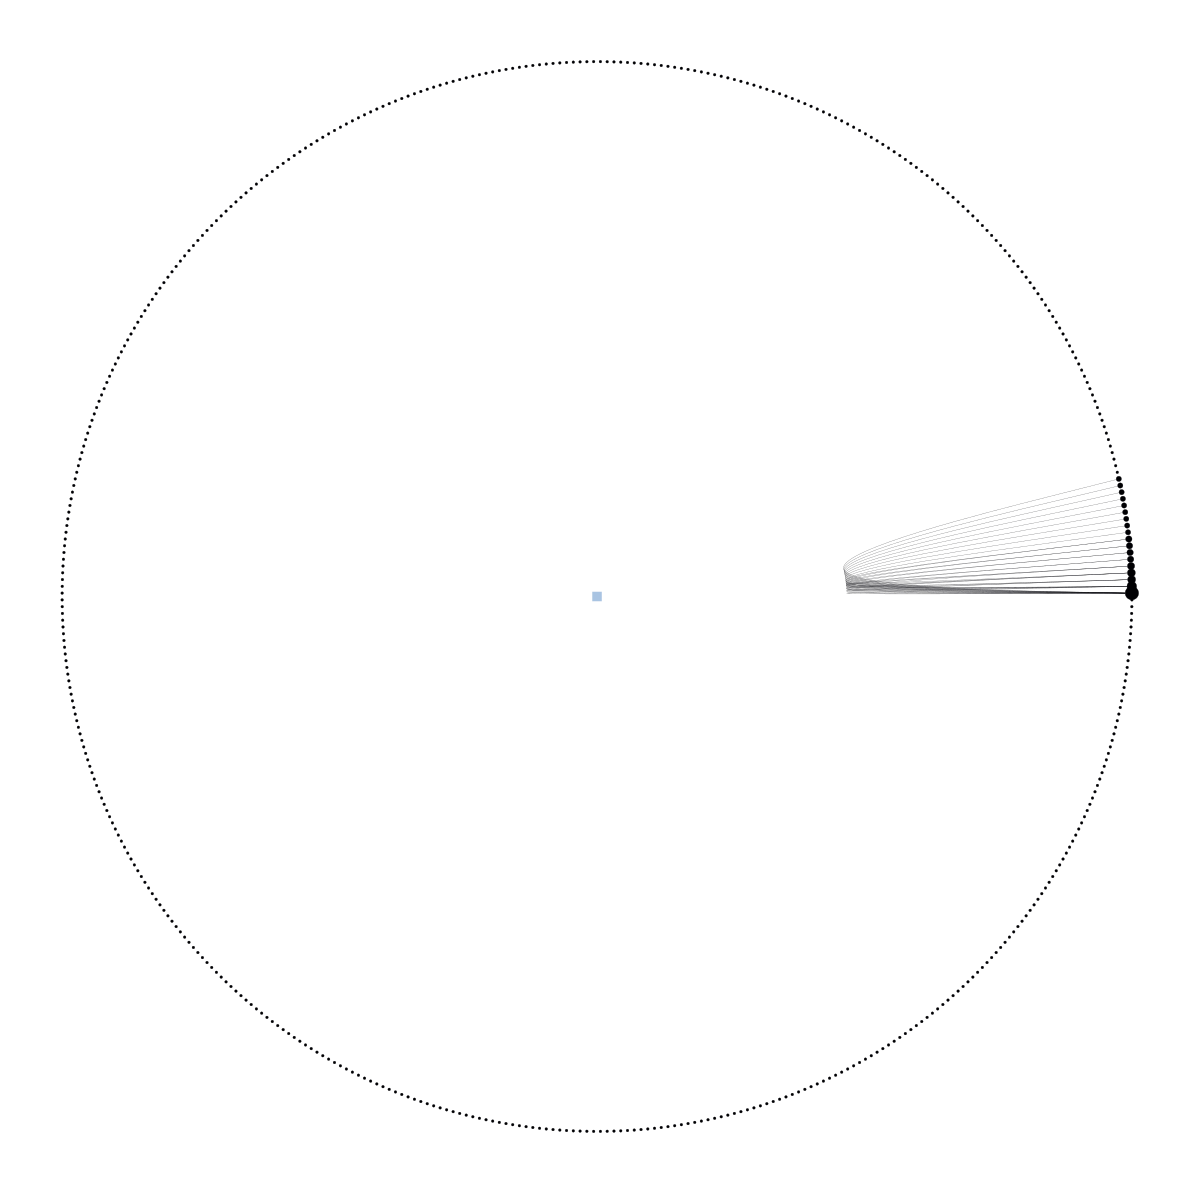

In [54]:
state = gt.minimize_nested_blockmodel_dl(nxG)
#state = gt.minimize_nested_blockmodel_dl(gtGraph, deg_corr=True, overlap=True)
gt.draw_hierarchy(state, output="1.png", vcmap=cm.magma)
Image("1.png")